# KNN based Anomaly Detection

KNN based Anomaly Detection입니다. KNN은 k-nearest neighbor를 응용한 것입니다. KNN은 가장 기초적인 인스턴스 기반 알고리즘으로, 모든 인스턴스가 n차원의 공간 R^n에 있는 점에 해당한다고 가정합니다. KNN에서 특정 인스턴스의 범주는 k개의 최근접한 이웃 인스턴스들의 주된 범주에 의해 결정됩니다.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

데이터는 Density based Anomaly detection과 마찬가지로 iris 데이터를 사용하였습니다. 

In [103]:
data = pd.read_csv('./iris.csv')
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [104]:
df = data[['petal.length', 'petal.width']]

Text(0, 0.5, 'Petal_width')

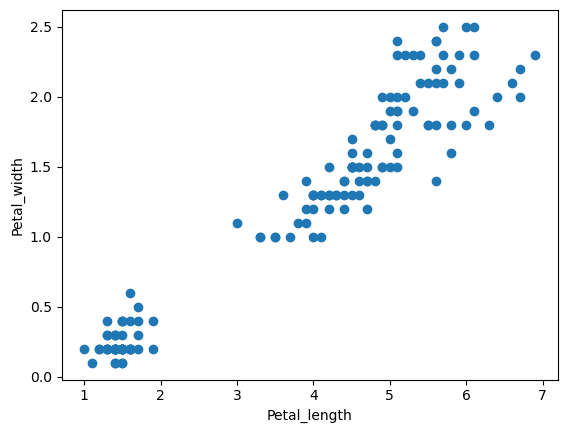

In [105]:
plt.scatter(df['petal.length'], df['petal.width'])
plt.xlabel("Petal_length", fontsize=10)
plt.ylabel("Petal_width",fontsize=10)

In [106]:
X = df.values

In [107]:
nbrs = NearestNeighbors(n_neighbors=3)

nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

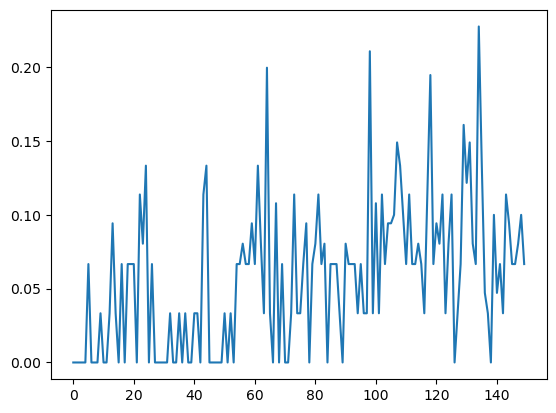

In [109]:
distances, indexes = nbrs.kneighbors(X)
plt.plot(distances.mean(axis=1))

In [110]:
index_knn = np.where(distances.mean(axis = 1) > 0.05)
index_knn

(array([  5,  13,  16,  18,  19,  20,  22,  23,  24,  26,  43,  44,  54,
         55,  56,  57,  58,  59,  60,  61,  62,  64,  67,  69,  73,  76,
         77,  79,  80,  81,  82,  83,  85,  86,  87,  90,  91,  92,  93,
         95,  98, 100, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
        112, 113, 114, 115, 117, 118, 119, 120, 121, 122, 124, 125, 128,
        129, 130, 131, 132, 133, 134, 135, 139, 141, 143, 144, 145, 146,
        147, 148, 149], dtype=int64),)

In [114]:
outlier_values = df.iloc[index_knn]
outlier_values

,petal.length,petal.width
64,3.6,1.3
98,3.0,1.1
118,6.9,2.3
129,5.8,1.6
134,5.6,1.4


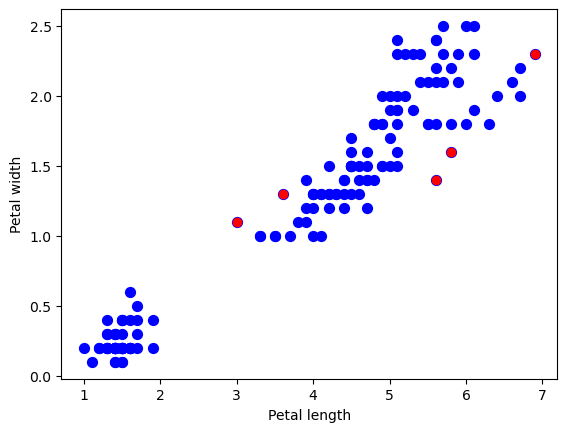

In [113]:
plt.scatter(df["petal.length"], df["petal.width"], color = "b", s = 50)
# plot outlier values
plt.xlabel("Petal length", fontsize=10)
plt.ylabel("Petal width", fontsize=10)
plt.scatter(outlier_values["petal.length"], outlier_values["petal.width"], color = "r")


## 실험결과
Density based Anomaly detection의 LOF와 비슷한 형태로 이상치를 탐지한 것을 확인할 수 있습니다. Lof와 유사하게 이웃을 기반으로 이상치를 탐지하였기 때문에 iris 데이터에 대해서는 유사하게 이상치를 탐지하였다고 볼 수 있습니다.

# PCA based Anomaly Detection

PCA(Principal Component Analysis) based Anomaly Detection은 주어진 데이터의 분산이 최대가 되도록 차원을 축소하는 방법을 기반으로 한 방법입니다. PCA based Anomaly Detection의 목적은 주어진 데이터의 차원을 축소, 분산을 가장 잘 보존하는 변수를 찾아내는 기법입니다. 원데이터의 변수를 선형 결합하여 새로운 변수를 만들어내는데, 이때 데이터들을 주성분 축에 사영하게 됩니다. 

In [116]:
import time
import warnings
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

iris = datasets.load_iris()
X = iris["data"][:, [2,3]]
y = iris["target"]

In [127]:
import sklearn.preprocessing

min_max_scaler = sklearn.preprocessing.StandardScaler()

np_scaled = min_max_scaler.fit_transform(X)
data_pca = pd.DataFrame(np_scaled)

In [128]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_pca)

In [131]:
scores_pca = pca.score_samples(X)
thresh_pca = np.quantile(scores_pca, 0.05)
index_pca = np.where(scores_pca <= thresh_pca)

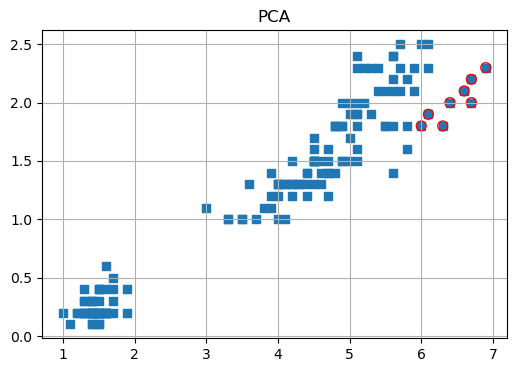

In [132]:
plt.figure(figsize= (6,4))
plt.grid(True)
plt.title(f'PCA')
plt.scatter(X[:,0], X[:,1], marker="s")
plt.scatter(X[index_pca,0], X[index_pca,1], marker="o", facecolor="none", edgecolor="r", s=50)

## 실험결과
실험결과 PCA based Anomaly Detection은 앞선 KNN 방식과는 다른 형태의 이상치 탐지 모습을 보이고 있습니다. 원데이터를 사영시킨 공간과 원데이터의 공간 사이의 에러가 클수록 이상치 점수를 부여하는 PCA 방식과 거리기반 방식의 차이점으로 볼 수 있으며 데이터가 조금 더 복잡하다면 차이를 뚜렷하게 볼 수 있을 것 같습니다.